===== Expense Tracker =====
1. Add Expense
2. Edit Expense
3. Delete Expense
4. View All Expenses
5. View Summary
6. Show Graphs
7. Exit
Choose an option: 1
Enter expense amount: 1000
Enter category (Food, Travel, Shopping, etc.): food
Enter date (year-month-day): 2024-10-12
Expense added successfully!

===== Expense Tracker =====
1. Add Expense
2. Edit Expense
3. Delete Expense
4. View All Expenses
5. View Summary
6. Show Graphs
7. Exit
Choose an option: 1
Enter expense amount: 2000
Enter category (Food, Travel, Shopping, etc.): travel
Enter date (year-month-day): 2024-10-22
Expense added successfully!

===== Expense Tracker =====
1. Add Expense
2. Edit Expense
3. Delete Expense
4. View All Expenses
5. View Summary
6. Show Graphs
7. Exit
Choose an option: 1
Enter expense amount: 1020
Enter category (Food, Travel, Shopping, etc.): food
Enter date (year-month-day): 2024-10-22
Expense added successfully!

===== Expense Tracker =====
1. Add Expense
2. Edit Expense
3. Delete Expense
4. Vie

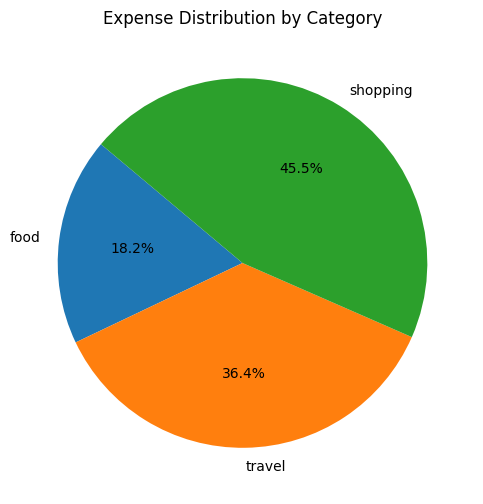

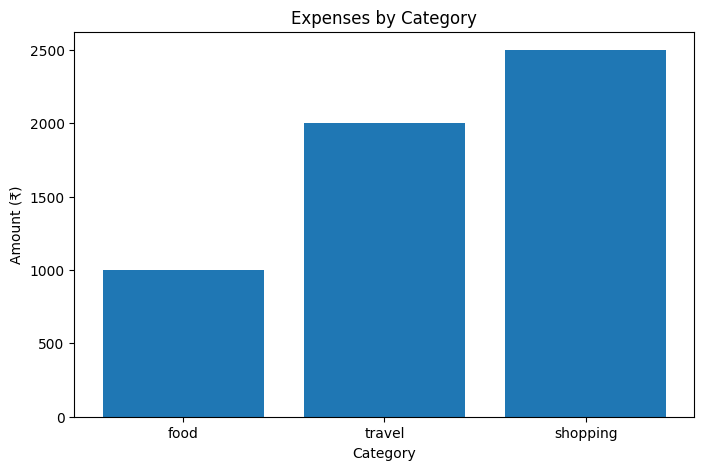

===== Expense Tracker =====
1. Add Expense
2. Edit Expense
3. Delete Expense
4. View All Expenses
5. View Summary
6. Show Graphs
7. Exit
Choose an option: 7
 Exiting... bye!


In [ ]:
import json
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

FILENAME = "expenses.json"

# -------------------------------
# Load & Save Functions
# -------------------------------
def load_expenses():
    if os.path.exists(FILENAME):
        with open(FILENAME, "r") as f:
            return json.load(f)
    return []

def save_expenses(expenses):
    with open(FILENAME, "w") as f:
        json.dump(expenses, f, indent=4)

# -------------------------------
# Add / Edit / Delete Expenses
# -------------------------------
def add_expense(expenses):
    try:
        amount = float(input("Enter expense amount: "))
        category = input("Enter category (Food, Travel, Shopping, etc.): ")
        date_input = input("Enter date (year-month-day): ")
        date = date_input if date_input else datetime.today().strftime("%Y-%m-%d")

        expense = {"amount": amount, "category": category, "date": date}
        expenses.append(expense)
        save_expenses(expenses)
        print("Expense added successfully!\n")
    except ValueError:
        print(" Invalid input! Please enter a valid amount.")

def edit_expense(expenses):
    view_expenses(expenses)
    try:
        index = int(input("Enter the expense number to edit: ")) - 1
        if 0 <= index < len(expenses):
            print("Leave blank to keep existing value.")
            new_amount = input(f"New amount ({expenses[index]['amount']}): ")
            new_category = input(f"New category ({expenses[index]['category']}): ")
            new_date = input(f"New date ({expenses[index]['date']}): ")

            if new_amount:
                expenses[index]["amount"] = float(new_amount)
            if new_category:
                expenses[index]["category"] = new_category
            if new_date:
                expenses[index]["date"] = new_date

            save_expenses(expenses)
            print(" Expense updated successfully!\n")
        else:
            print(" Invalid selection.")
    except ValueError:
        print(" Invalid input.")

def delete_expense(expenses):
    view_expenses(expenses)
    try:
        index = int(input("Enter the expense number to delete: ")) - 1
        if 0 <= index < len(expenses):
            removed = expenses.pop(index)
            save_expenses(expenses)
            print(f" Deleted expense: {removed}\n")
        else:
            print(" Invalid selection.")
    except ValueError:
        print(" Invalid input.")

# -------------------------------
# View Functions
# -------------------------------
def view_expenses(expenses):
    if not expenses:
        print(" No expenses recorded yet.\n")
        return
    print("\n All Expenses:")
    for i, e in enumerate(expenses, 1):
        print(f"{i}. {e['date']} - {e['category']} - ₹{e['amount']}")
    print()

def view_summary(expenses):
    if not expenses:
        print("No expenses to summarize.\n")
        return

    total = sum(e["amount"] for e in expenses)
    print(f"\n Total Spending: ₹{total}")

    # Spending by category
    category_summary = {}
    for e in expenses:
        category_summary[e["category"]] = category_summary.get(e["category"], 0) + e["amount"]

    print("\n Spending by Category:")
    for cat, amt in category_summary.items():
        print(f"   {cat}: ₹{amt}")

    # Daily Summary
    daily_summary = {}
    for e in expenses:
        daily_summary[e["date"]] = daily_summary.get(e["date"], 0) + e["amount"]

    print("\n Daily Spending:")
    for d, amt in daily_summary.items():
        print(f"   {d}: ₹{amt}")

    # Weekly Summary
    weekly_summary = {}
    for e in expenses:
        date_obj = datetime.strptime(e["date"], "%Y-%m-%d")
        week_start = (date_obj - timedelta(days=date_obj.weekday())).strftime("%Y-%m-%d")
        weekly_summary[week_start] = weekly_summary.get(week_start, 0) + e["amount"]

    print("\n Weekly Spending (Week starting date):")
    for wk, amt in weekly_summary.items():
        print(f"   {wk}: ₹{amt}")

    # Monthly Summary
    monthly_summary = {}
    for e in expenses:
        month = e["date"][:7]  # YYYY-MM
        monthly_summary[month] = monthly_summary.get(month, 0) + e["amount"]

    print("\n Monthly Spending:")
    for m, amt in monthly_summary.items():
        print(f"   {m}: ₹{amt}")
    print()

# -------------------------------
# Graphs with Matplotlib
# -------------------------------
def show_graphs(expenses):
    if not expenses:
        print(" No expenses to visualize.\n")
        return

    categories = {}
    for e in expenses:
        categories[e["category"]] = categories.get(e["category"], 0) + e["amount"]

    # Pie Chart
    plt.figure(figsize=(6, 6))
    plt.pie(categories.values(), labels=categories.keys(), autopct="%1.1f%%", startangle=140)
    plt.title("Expense Distribution by Category")
    plt.show()

    # Bar Chart
    plt.figure(figsize=(8, 5))
    plt.bar(categories.keys(), categories.values())
    plt.xlabel("Category")
    plt.ylabel("Amount (₹)")
    plt.title("Expenses by Category")
    plt.show()

# -------------------------------
# Main Menu
# -------------------------------
def main():
    expenses = load_expenses()

    while True:
        print("===== Expense Tracker =====")
        print("1. Add Expense")
        print("2. Edit Expense")
        print("3. Delete Expense")
        print("4. View All Expenses")
        print("5. View Summary")
        print("6. Show Graphs")
        print("7. Exit")

        choice = input("Choose an option: ")

        if choice == "1":
            add_expense(expenses)
        elif choice == "2":
            edit_expense(expenses)
        elif choice == "3":
            delete_expense(expenses)
        elif choice == "4":
            view_expenses(expenses)
        elif choice == "5":
            view_summary(expenses)
        elif choice == "6":
            show_graphs(expenses)
        elif choice == "7":
            print(" Exiting... bye!")
            break
        else:
            print("Invalid choice! Try again.\n")

if __name__ == "__main__":
    main()
